<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/emnist_classification_pipeline_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import cv2

In [ ]:
'''
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('model.h5')

# Compile the loaded model
loaded_model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming you have new data (x_train_new, y_train_new), or you want to train more on existing data:
# Replace this with your fitting code:
loaded_model.fit(x_train_new, y_train_new, epochs=80, validation_data=(x_val, y_val))

# Save the model after retraining (optional)
loaded_model.save('retrained_model.h5')
'''

Downloading the dataset

In [ ]:
import tensorflow_datasets as tfds
ds = tfds.load('emnist/letters')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/88800 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/3.0.0.incompleteQT1D7L/emnist-train.tfrecord*...:   0%|    …

Generating test examples...:   0%|          | 0/14800 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/3.0.0.incompleteQT1D7L/emnist-test.tfrecord*...:   0%|     …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.0.0. Subsequent calls will reuse this data.


Creating x_train, y_train, x_test, y_test

In [ ]:
import tensorflow_datasets as tfds
import numpy as np

ds = tfds.load('emnist/letters', split='train')

x_train = []
y_train = []

for example in ds:
    image = example['image']
    label = example['label']

    x_train.append(image.numpy())
    y_train.append(label.numpy())

In [ ]:
np.array(x_train).shape, np.array(y_train).shape

((88800, 28, 28, 1), (88800,))

In [ ]:
ds = tfds.load('emnist/letters', split='test')

x_test = []
y_test = []

for example in ds:
    image = example['image']
    label = example['label']

    x_test.append(image.numpy())
    y_test.append(label.numpy())

In [ ]:
np.array(x_test).shape, np.array(y_test).shape

((14800, 28, 28, 1), (14800,))

In [ ]:
from collections import Counter

freq_counter = Counter(y_train)
for value, frequency in freq_counter.items():
    print(f"Value: {value}, Frequency: {frequency}")

Value: 25, Frequency: 3453
Value: 7, Frequency: 3385
Value: 11, Frequency: 3438
Value: 10, Frequency: 3402
Value: 4, Frequency: 3398
Value: 24, Frequency: 3437
Value: 18, Frequency: 3419
Value: 22, Frequency: 3422
Value: 2, Frequency: 3396
Value: 13, Frequency: 3402
Value: 16, Frequency: 3430
Value: 14, Frequency: 3365
Value: 21, Frequency: 3419
Value: 23, Frequency: 3423
Value: 19, Frequency: 3392
Value: 8, Frequency: 3424
Value: 15, Frequency: 3408
Value: 5, Frequency: 3437
Value: 20, Frequency: 3436
Value: 3, Frequency: 3419
Value: 1, Frequency: 3396
Value: 12, Frequency: 3415
Value: 9, Frequency: 3428
Value: 26, Frequency: 3427
Value: 6, Frequency: 3394
Value: 17, Frequency: 3435


Image Processing

13


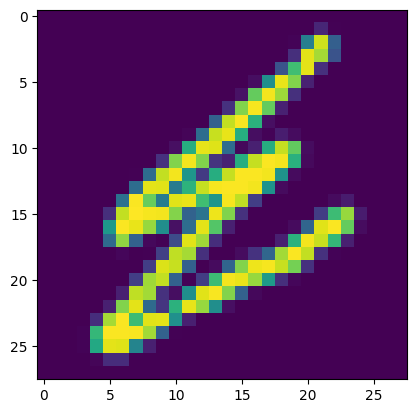

In [ ]:
plt.imshow(x_test[0])
print(y_test[0])

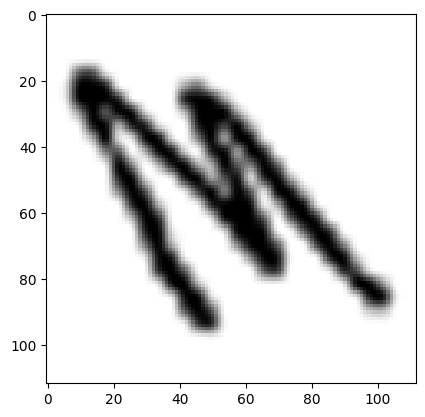

In [ ]:
xxx = x_test

image_bytes = cv2.imencode('.png', xxx[0])[1].tobytes()
decoded_image = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)
img = decoded_image
img = Image.fromarray(img)
img = img.resize((112, 112))
img = ImageOps.invert(img)
img = ImageOps.mirror(img)
img = img.rotate(-90, expand=True)
img_array = np.array(img)

plt.imshow(img_array)

In [ ]:
# Function to convert and preprocess images
def preprocess_images(image_list):
    processed_images = []
    for i in image_list:
        image_bytes = cv2.imencode('.png', i)[1].tobytes()
        decoded_image = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)

        img = decoded_image
        img = Image.fromarray(img)
        img = img.resize((112, 112))
        img = ImageOps.invert(img)
        img = ImageOps.mirror(img)
        img = img.rotate(-90, expand=True)
        img_array = np.array(img)

        processed_images.append(img_array)

    return processed_images

In [ ]:
# Preprocess images
processed_x_train = preprocess_images(x_train)
processed_x_test = preprocess_images(x_test)

In [ ]:
np.array(processed_x_train).shape, np.array(processed_x_test).shape

((88800, 112, 112, 3), (14800, 112, 112, 3))

Grouping alphabets

In [ ]:
mapping = {
    16: 2,
    14: 3,
    21: 3,
    13: 5,
    7: 6,
    8: 7,
    9: 8,
    12: 8,
    10: 9,
    11: 10,
    15: 11,
    17: 12,
    18: 13,
    19: 14,
    20: 15,
    22: 16,
    23: 16,
    26: 16,
    24: 17,
    25: 18
}

processed_y_train = [mapping[val] if val in mapping else val for val in y_train]
processed_y_test = [mapping[val] if val in mapping else val for val in y_test]

In [ ]:
from collections import Counter

freq_counter = Counter(processed_y_train)
for value, frequency in freq_counter.items():
    print(f"Value: {value}, Frequency: {frequency}")

Value: 18, Frequency: 3453
Value: 6, Frequency: 6779
Value: 10, Frequency: 3438
Value: 9, Frequency: 3402
Value: 4, Frequency: 3398
Value: 17, Frequency: 3437
Value: 13, Frequency: 3419
Value: 16, Frequency: 10272
Value: 2, Frequency: 6826
Value: 5, Frequency: 6839
Value: 3, Frequency: 10203
Value: 14, Frequency: 3392
Value: 7, Frequency: 3424
Value: 11, Frequency: 3408
Value: 15, Frequency: 3436
Value: 1, Frequency: 3396
Value: 8, Frequency: 6843
Value: 12, Frequency: 3435


Cross-Checking

18


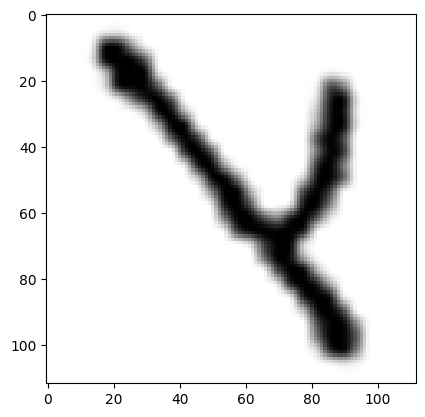

In [ ]:
plt.imshow(processed_x_train[0])
print(processed_y_train[0])

Label Binarizer

In [ ]:
processed_y_train2 = []
for i in processed_y_train:
    a = [i]
    processed_y_train2.append(a)

processed_y_test2 = []
for i in processed_y_test:
    a = [i]
    processed_y_test2.append(a)

print(processed_y_train2[2], processed_y_test2[0])

[18] [5]


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit(processed_y_train2)
processed_y_train = mlb.transform(processed_y_train2)
processed_y_test = mlb.transform(processed_y_test2)

print("Classes:", mlb.classes_)
print(processed_y_test[5])

Classes: [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
processed_y_test2[5]

[1]

In [ ]:
processed_x_train = np.array(processed_x_train)
processed_y_train = np.array(processed_y_train)
processed_x_test = np.array(processed_x_test)
processed_y_test = np.array(processed_y_test)

In [ ]:
'''x_train_scaled = processed_x_train/255;
x_test_scaled = processed_x_test/255'''

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import optimizers

num_of_classes = 18
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential()
model.add(layers.UpSampling2D((2, 2)))
model.add(convolutional_base)
model.add(layers.Flatten()) # converts the matrix in 1-D
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) # turns off a few neurons to prevent over-fitting
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='sigmoid'))

model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(processed_x_train, processed_y_train, validation_split=0.2, epochs=80, batch_size=640)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
loss, accuracy = model.evaluate(processed_x_test, processed_y_test)

In [ ]:
h = history

# plot the loss function value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [ ]:
# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()